## NES-LTER: underway API select which of two sensors
Stace Beaulieu 2020-04-07

In the underway data provided by Endeavor and Armstrong on NES-LTER Transect cruises, there are often two sensors measuring the same parameter. This is a notebook to help select which of two sensors to display in the regularized columns in the NES-LTER REST API.


Read in underway data from a particular cruise

In [568]:
import pandas as pd

# https://nes-lter-data.whoi.edu/api/underway/ar32.csv
# note to replace the cruise identifier
BASE_URL = 'https://nes-lter-data.whoi.edu/api/underway/'
uw = pd.read_csv(BASE_URL + 'ar22.csv',
                 parse_dates=['date'], index_col='date')

uw.head(5)


,dec_lat,dec_lon,spd,hdt,cog,sog,wxtp_ta,wxts_ta,wxtp_pa,wxts_pa,...,par,sbe45s,sbe48t,barom_p,barom_s,flr,ssvdslog,depth12,depth35,em122
date,,,,,,,,,,,,,,,,,,,,,
2017-09-02 00:00:03.058000+00:00,41.524,-70.672,NaN,62.72,135.0,0.01,18.6,18.4,1017.0,1016.9,...,0.0,0.2799,20.5972,1019.1,1019.0,61.9,1484.585,NaN,NaN,NaN
2017-09-02 00:01:03.058000+00:00,41.524,-70.672,NaN,62.78,191.3,0.01,18.6,18.4,1017.0,1016.9,...,0.0,0.2799,20.6320,1019.1,1019.0,61.6,1484.690,NaN,NaN,NaN
2017-09-02 00:02:03.058000+00:00,41.524,-70.672,NaN,62.84,243.4,0.00,18.6,18.4,1017.0,1017.0,...,0.0,0.2799,20.6710,1019.1,1019.1,61.6,1484.808,NaN,NaN,NaN
2017-09-02 00:03:03.058000+00:00,41.524,-70.672,NaN,62.75,180.0,0.00,18.6,18.4,1017.0,1017.0,...,0.0,0.2799,20.7296,1019.1,1019.1,61.7,1484.984,NaN,NaN,NaN
2017-09-02 00:04:03.058000+00:00,41.524,-70.672,NaN,62.85,135.0,0.01,18.6,18.4,1017.0,1017.0,...,0.0,0.2799,20.7681,1019.1,1019.1,61.5,1485.100,NaN,NaN,NaN


In [496]:
# List columns
list(uw.columns)

['dec_lat',
 'dec_lon',
 'spd',
 'hdt',
 'cog',
 'sog',
 'wxtp_ta',
 'wxts_ta',
 'wxtp_pa',
 'wxts_pa',
 'wxtp_ri',
 'wxts_ri',
 'wxtp_rc',
 'wxts_rc',
 'wxtp_dm',
 'wxts_dm',
 'wxtp_sm',
 'wxts_sm',
 'wxtp_ua',
 'wxts_ua',
 'wxtp_ts',
 'wxts_ts',
 'wxtp_td',
 'wxts_td',
 'rad_sw',
 'rad_lw',
 'par',
 'sbe45s',
 'sbe48t',
 'barom_p',
 'barom_s',
 'flr',
 'ssvdslog',
 'depth12',
 'depth35',
 'em122']

Select two columns to compare

In [569]:
# # ar22, ar24a, ar24b, ar24c, ar28a, ar28b, ar31a, ar31b, ar31c, ar32
# # ar34a, ar34b, ar38, ar39a, ar39b
# # airTemperature WXTP_Ta and WXTS_Ta Port and Starboard
# airTempPort = uw['wxtp_ta']
# airTempStbd = uw['wxts_ta']

# # ar22, ar24a, ar24b, ar24c, ar28a, ar28b, ar31a, ar31b, ar31c, ar32
# # ar34a, ar34b, ar38, ar39a, ar39b
# # atmosphericPressure BAROM_P and BAROM_S Port and Starboard
# atmPressPort = uw['barom_p']
# atmPressStbd = uw['barom_s']

# # ar22, ar24a, ar24b, ar24c, ar32 windSpeedTrue WXTP_TS and WXTS_TS Port and Starboard
# Port = uw['wxtp_ts']
# Stbd = uw['wxts_ts']

# ar22, ar32 windDirectionTrue WXTP_TD and WXTS_TD Port and Starboard
Port = uw['wxtp_td']
Stbd = uw['wxts_td']

In [570]:
# airTempPort.min(), airTempPort.mean(), airTempPort.max()
# airTempPort['2017-11-06'].mean()
# atmPressPort.min(), atmPressPort.mean(), atmPressPort.max()
Port.min(), Port.mean(), Port.max()

(0.1, 154.44402025710949, 359.9)

In [571]:
# airTempStbd.min(), airTempStbd.mean(), airTempStbd.max()
# airTempStbd['2017-11-06'].mean()
# atmPressStbd.min(), atmPressStbd.mean(), atmPressStbd.max()
Stbd.min(), Stbd.mean(), Stbd.max()

(0.1, 151.708959875341, 359.9)

Find if there are any NaNs

In [572]:
import numpy as np

# indices = list(np.where(airTempPort.isnull()))
# indices = list(np.where(atmPressPort.isnull()))
indices = list(np.where(Port.isnull()))
indices

[array([], dtype=int64)]

In [573]:
import numpy as np

# indices = list(np.where(airTempStbd.isnull()))
# indices = list(np.where(atmPressStbd.isnull()))
indices = list(np.where(Stbd.isnull()))
indices

[array([], dtype=int64)]

Plot time series for both sensors and correlation

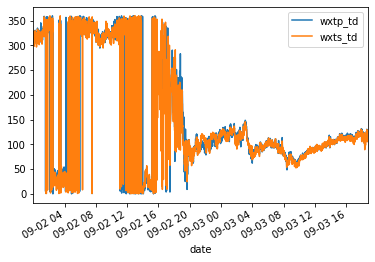

In [574]:
# when plotting a series, pandas uses the index
# as x axis labels, which is convenient
%matplotlib inline

# airTempPort.plot();
# airTempStbd.plot();
# atmPressPort.plot();
# atmPressStbd.plot();
Port.plot();
Stbd.plot();

plt.legend()

In [575]:
# airTempPort.corr(airTempStbd)
# atmPressPort.corr(atmPressStbd)
# # note this correlation is not as appropriate for windDirectionTrue
Port.corr(Stbd)

0.8790326901284465

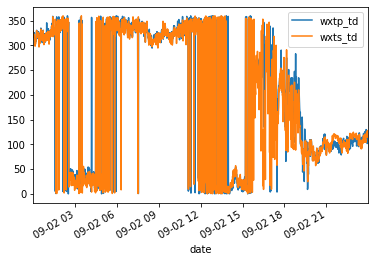

In [576]:
# plot particular day

# Select 2018-11-13 data - view first few records
# airTempPort['2018-11-13'].head()

%matplotlib inline

# airTempPort['2019-10-11'].plot();
# airTempStbd['2019-10-11'].plot();
# atmPressPort['2019-10-11'].plot();
# atmPressStbd['2019-10-11'].plot();
Port['2017-09-02'].plot();
Stbd['2017-09-02'].plot();
plt.legend()


Plot 1:1 line on scatterplot

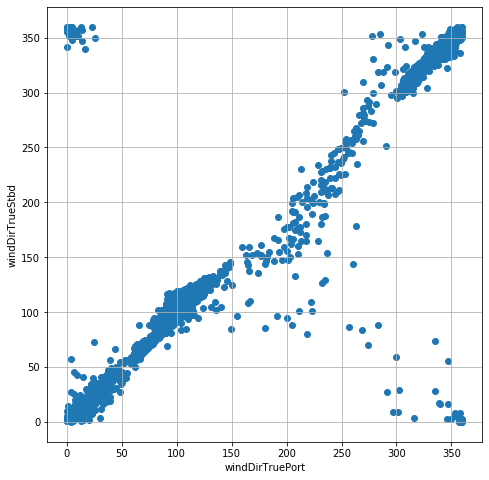

In [580]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
# ax.scatter(airTempPort, airTempStbd)
# ax.scatter(atmPressPort, atmPressStbd)
ax.scatter(Port, Stbd)

ax.grid(True)
# ax.set_xlabel('airTempPort')
# ax.set_ylabel('airTempStbd')
# ax.set_xlabel('atmPressPort')
# ax.set_ylabel('atmPressStbd')
# ax.set_xlabel('windSpeedTruePort')
# ax.set_ylabel('windSpeedTrueStbd')
ax.set_xlabel('windDirTruePort')
ax.set_ylabel('windDirTrueStbd')
# ax.set_xticks(range(0,22,2))
# ax.set_yticks(range(0,22,2))
ax.set_aspect('equal', 'box')
# fig.tight_layout()
figsize=(10,8)

plt.show()

Check for offset with slope and intercept of linear regression

In [579]:
# Would like to get intercept of linear regression to be able to adjust Stbd offset when needed to fill Port NaN
from scipy import stats
import numpy as np

# x = airTempPort
# y = airTempStbd
# x = atmPressPort
# y = atmPressStbd
x = Port
y = Stbd
# type(airTempPort) # pandas.core.series.Series
# x and y need to be array_like
# type(x.to_numpy())

# need to deal with NaNs to get linear regression
mask = ~np.isnan(x.to_numpy()) & ~np.isnan(y.to_numpy())
slope, intercept, r_value, p_value, std_err = stats.linregress(x.to_numpy()[mask], y.to_numpy()[mask])

# slope, intercept, r_value, p_value, std_err = stats.linregress(x.to_numpy(),y.to_numpy())
print("slope then intercept:", slope, intercept)


slope then intercept: 0.8760577200387484 16.407083615279277


## Assessment
Armstrong cruises ar22 through ar39b:
*airTemp sensors* airTempPort 'wxtp_ta' in general offset a bit higher than airTempStbd 'wxts_ta'; data provided with precision 0.1, so I think it is conservative to fill missing Port with Stbd + 0.1
*atmPress sensors* match very well; in general I think one can be filled with the other
*windSpeed sensors*

### ar22
wxtp_ta: airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta' but in the absence of any other info our default is to choose the 'first' column so that's Port

barom_p: atmPress Port is less than Stbd for couple hours on 2017-09-03, without knowing any reason for this, I'd still say to use default "1st" sensor listed Port. Note no obvious sensor offset; regression slope is not 1:1.

wxtp_ts: windSpeed looks like scattered around 1:1 except for Stbd offset greater than Port early on 2017-09-03

wxtp_td: windDir in general 1:1 but some values Port 270 when Stbd 90 why offset 180 deg?

### ar24a
list of columns differs from 'regular' Armstrong underway data; has aml_sst, est_nitrate, est_phosphate
wxtp_ta: as with previous cruise airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta' but in the absence of any other info our default is to choose the 'first' column so that's Port

barom_p: atmPress Port matches very well to Stbd

wxtp_ts: windSpeed both sensors missing 2 same separate data points, both have same outlier on 2017-10-25, Stbd may have more outliers on 2017-10-23, linear regression slope 0.9987 for the whole time series

### ar24b
Stbd met sensors missing 4 hrs on 2017-11-02
wxtp_ta: as with previous cruises airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta', Stbd missing 4 hrs

barom_p: atmPress Port matches very well to Stbd, Stbd missing 4 hrs

wxtp_ts: windSpeed Stbd missing 4 hrs, when Stbd comes back on 2017-11-02 15:56:48.400000+00:00 both sensors have outlier 0.6, lots of scatter, regression slope is not 1:1

### ar24c
Port sensors missing 14 hrs on 2017-11-05
When the Port sensors come back at 2017-11-05 22:49:43.386000+00:00 creates one time point (one row) with zero outlier for both sensors
Could replace this time point or the exact match to zero with NaN
wxts_ta: Stbd approx. 0.15 less than Port
either provide wxts_ta + 0.1 or provide wxtp_ta as usual but fill blanks with wxts_ta + 0.1; in either case need to replace one time point or the exact match to zero with NaN

barom_s: BUT need to replace one time point or the exact match to 2.1 with NaN; atmPress both sensors go to invalid number 2.1 likely due to altitude correction

?wxts_ts: windSpeed scatterplot looks like Stbd measures slightly higher not an offset but an increase in slope, regression slope 1.01636, I did not see this for previous leg nor other comparisons

### ar28a
wxtp_ta: as with some previous cruises airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta'; looks like both sensors dip on the 25th and 26th

barom_p: atmPress Port matches well to Stbd, sometimes Stbd appears to be maybe 0.1 higher but that is an insignificant fraction of the value

### ar28b
wxtp_ta: as with some previous cruises airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta', but not as steady as previous cruise ar28a

barom_p: atmPress Port matches well to Stbd, sometimes Stbd appears to be maybe 0.1 higher but that is an insignificant fraction of the value

### ar31a
wxtp_ta: airTempPort 'wxtp_ta' very similar to airTempStbd 'wxts_ta'

barom_p: atmPress Port matches well to Stbd

### ar31b
wxtp_ta: as with some previous cruises airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta', Stbd missing an hour on 2018-10-29

barom_p: although Port slightly less than Stbd for some time on 2018-10-27 linear regression slope 0.999 for the whole time series, Stbd missing an hour on 2018-10-29

### ar31c
Port sensors missing 1 hr on 2018-11-08
wxtp_ta: airTempPort 'wxtp_ta' similar to airTempStbd 'wxts_ta', but Port missing an hour on 2018-11-08

barom_p: but Port missing an hour on 2018-11-08, linear regression slope 0.999 for the whole time series so could provide barom_s


### ar32
ar32 I opened the csv file to see that the starboard met sensors all were missing same 25 min of data

wxtp_ta: airTempPort 'wxtp_ta' very similar to airTempStbd 'wxts_ta' some variability at the highest temperatures, Stbd missing some values

barom_p: atmPressPort 'barom_p' very similar to atmPressStbd 'barom_s' some variability at the lower pressures, Stbd missing some values

wxtp_ts: windSpeedTrue use Port, something happened to the Stbd wind speed sensor on 2018-11-13

wxtp_td: windDirectionTrue use Port but direction not always exactly aligned with Stbd maybe due to orientation of the vessel into the wind

### ar34a
wxtp_ta: airTempPort 'wxtp_ta' very similar to airTempStbd 'wxts_ta'

barom_p: although Port slightly less than Stbd for some time on 2019-04-04 linear regression slope 1.000 for the whole time series

### ar34b
wxtp_ta: as with some previous cruises airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta', but more variability off the 1:1 than some of the previous cruises

barom_p: atmPress Port matches well to Stbd, sometimes Stbd appears to be maybe 0.1 higher but that is an insignificant fraction of the value

### ar38
wxtp_ta: as with some previous cruises airTempPort 'wxtp_ta' seems to be offset a bit higher than airTempStbd 'wxts_ta'

barom_p: atmPress there is more variability in both of these sensors on this particular cruise as compared to previous Armstrong cruises, crazy looking scatterplot, regression slope is not 1:1. What happened on 2019-09-20 at approx 15:00 and lasted ~1 day?

### ar39a
Port met sensors missing 20 min
Stbd met sensors missing different 2 min
wxtp_ta: as with some previous cruises airTempPort 'wxtp_ta' seems to be offset about 0.1 higher than airTempStbd 'wxts_ta', Port missing 20 min, Stbd missing different 2 min, Stbd looks a bit more spiky

barom_p: atmPress Port matches well to Stbd, atmPress Port missing 20 min, Stbd missing different 2 min, linear regression slope 1.0005 for the whole time series

### ar39b
Port sensors missing 22 hrs 2019-10-11 into 2019-10-12
airTemp sensors as with some previous cruises airTempPort 'wxtp_ta' seems to be offset about 0.1 higher than airTempStbd 'wxts_ta'; linear regression intercept -0.0855
appear to provide data with precision 0.1, so I think it is conservative to fill missing Port with Stbd + 0.1
either provide wxts_ta + 0.1 or provide wxtp_ta as usual but fill blanks with wxts_ta + 0.1

barom_s: Stbd has a slight outlier on 2019-10-11 while Port is missing, Port less than Stbd for some of 2019-10-08, linear regression slope 0.9986 for the whole time series
